# Задача Дирихле для уравнения Пуассона в квадрате

$
\Delta u = f(x, y), \quad (x, y) \in \Omega
$

Для нахождения численного решения используется итерационный метод Зейделя.

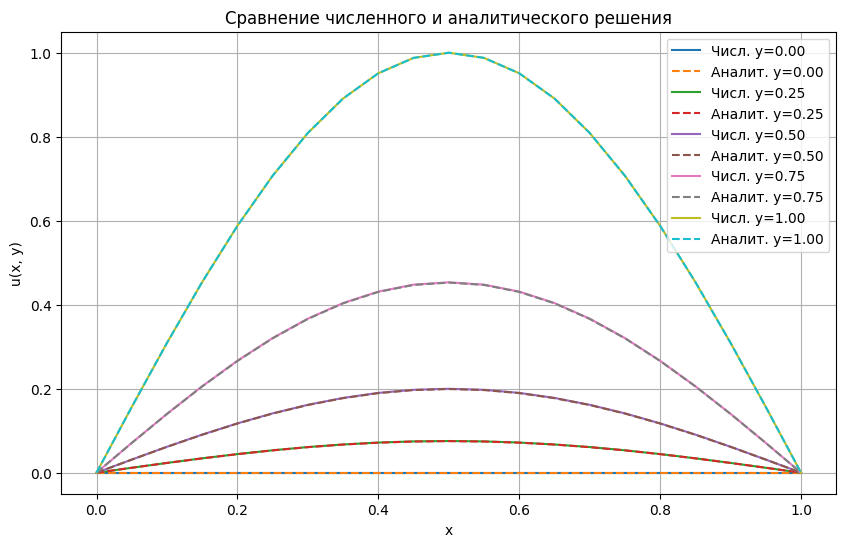

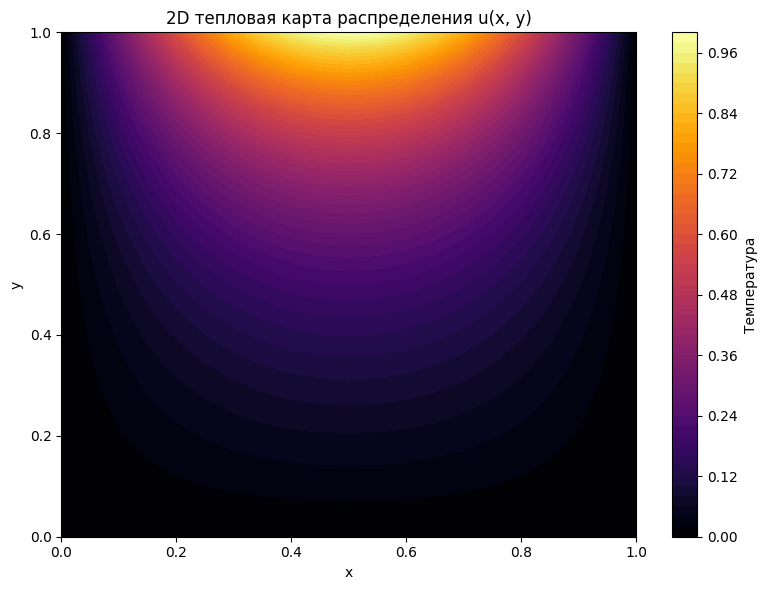

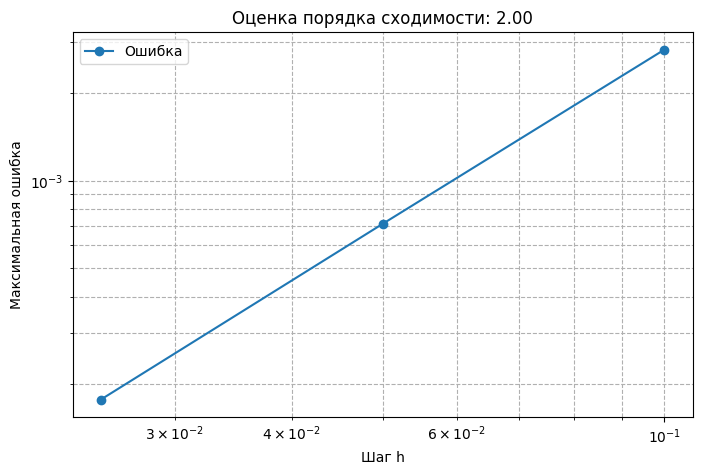

Оценённый порядок метода: 2.00


In [22]:
import numpy as np
import matplotlib.pyplot as plt

l = 1.0
eps = 1e-8
max_iter = 5000

phi1 = lambda x: 0                      # u(x, 0)
phi2 = lambda x: np.sin(np.pi * x)     # u(x, l)
phi3 = lambda y: 0                     # u(0, y)
phi4 = lambda y: 0                      # u(l, y)

def analytical_solution(x, y):
    return np.sinh(np.pi * y) * np.sin(np.pi * x) / np.sinh(np.pi)

def solve_poisson(Nx, Ny):
    hx, hy = l / Nx, l / Ny
    x = np.linspace(0, l, Nx + 1)
    y = np.linspace(0, l, Ny + 1)
    Ax = 1 / hx**2
    Ay = 1 / hy**2
    C = 2 * (Ax + Ay)

    f = np.zeros((Nx + 1, Ny + 1))
    u = np.zeros_like(f)

    u[:, 0] = [phi1(xi) for xi in x]
    u[:, -1] = [phi2(xi) for xi in x]
    u[0, :] = [phi3(yi) for yi in y]
    u[-1, :] = [phi4(yi) for yi in y]

    for _ in range(max_iter):
        max_diff = 0
        for i in range(1, Nx):
            for j in range(1, Ny):
                u_new = (Ax * (u[i - 1, j] + u[i + 1, j]) +
                         Ay * (u[i, j - 1] + u[i, j + 1]) -
                         f[i, j]) / C
                max_diff = max(max_diff, abs(u_new - u[i, j]))
                u[i, j] = u_new
        if max_diff < eps:
            break

    u_exact = np.array([[analytical_solution(x[i], y[j]) for j in range(Ny + 1)] for i in range(Nx + 1)])
    error = np.max(np.abs(u - u_exact))

    return x, y, u, u_exact, error

def plot_slices(x, y, u, u_exact):
    slice_indices = [0, len(y)//4, len(y)//2, 3*len(y)//4, -1]

    plt.figure(figsize=(10, 6))
    for j in slice_indices:
        plt.plot(x, u[:, j], label=f'Числ. y={y[j]:.2f}', linestyle='-')
        plt.plot(x, u_exact[:, j], linestyle='--', label=f'Аналит. y={y[j]:.2f}')
    plt.title('Сравнение численного и аналитического решения')
    plt.xlabel('x')
    plt.ylabel('u(x, y)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_heatmap(x, y, u):
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(x, y, indexing='ij')
    cp = plt.contourf(X, Y, u, 50, cmap='inferno')
    plt.colorbar(cp, label='Температура')
    plt.title('2D тепловая карта распределения u(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def estimate_convergence():
    Ns = [10, 20, 40]
    hs = [l / N for N in Ns]
    errors = []

    for N in Ns:
        _, _, _, _, err = solve_poisson(N, N)
        errors.append(err)

    log_h = np.log(hs)
    log_err = np.log(errors)
    order = np.polyfit(log_h, log_err, 1)[0]

    plt.figure(figsize=(8, 5))
    plt.loglog(hs, errors, 'o-', label='Ошибка')
    plt.title(f'Оценка порядка сходимости: {abs(order):.2f}')
    plt.xlabel('Шаг h')
    plt.ylabel('Максимальная ошибка')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.show()

    print(f"Оценённый порядок метода: {abs(order):.2f}")

if __name__ == "__main__":
    Nx, Ny = 20, 20
    x, y, u, u_exact, error = solve_poisson(Nx, Ny)

    plot_slices(x, y, u, u_exact)
    plot_heatmap(x, y, u)
    estimate_convergence()


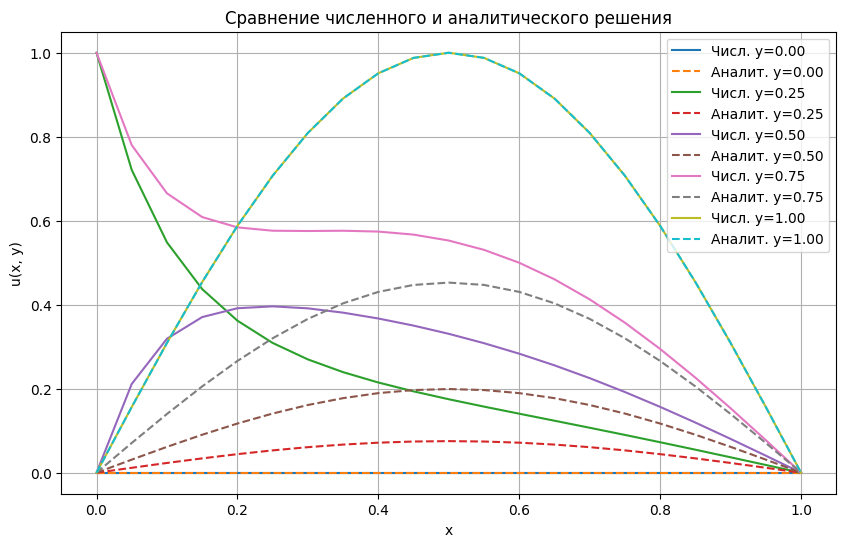

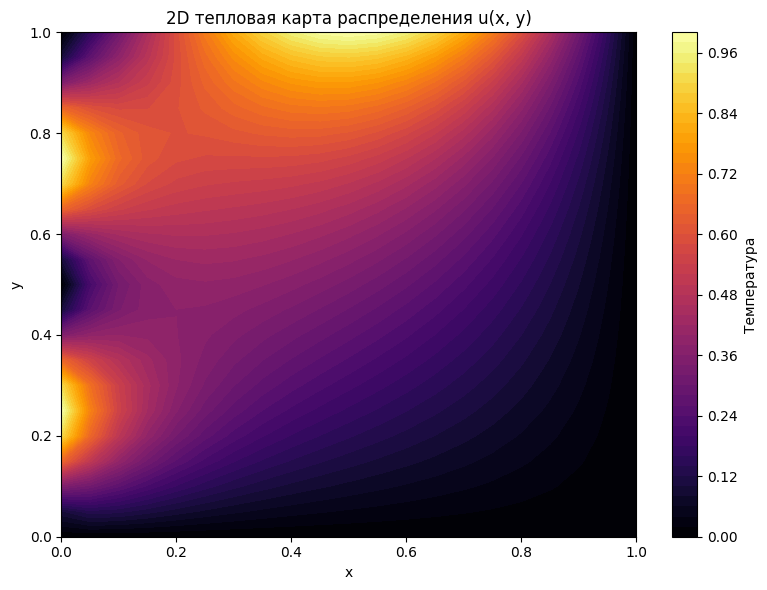

In [24]:
import numpy as np
import matplotlib.pyplot as plt

l = 1.0
eps = 1e-8
max_iter = 5000

phi1 = lambda x: 0                      # u(x, 0)
phi2 = lambda x: np.sin(np.pi * x)     # u(x, l)
phi3 = lambda y: np.sin(np.pi * y * 2)**2                     # u(0, y)
phi4 = lambda y: 0                      # u(l, y)

def analytical_solution(x, y):
    return np.sinh(np.pi * y) * np.sin(np.pi * x) / np.sinh(np.pi)

def solve_poisson(Nx, Ny):
    hx, hy = l / Nx, l / Ny
    x = np.linspace(0, l, Nx + 1)
    y = np.linspace(0, l, Ny + 1)
    Ax = 1 / hx**2
    Ay = 1 / hy**2
    C = 2 * (Ax + Ay)

    f = np.zeros((Nx + 1, Ny + 1))
    u = np.zeros_like(f)

    u[:, 0] = [phi1(xi) for xi in x]
    u[:, -1] = [phi2(xi) for xi in x]
    u[0, :] = [phi3(yi) for yi in y]
    u[-1, :] = [phi4(yi) for yi in y]

    for _ in range(max_iter):
        max_diff = 0
        for i in range(1, Nx):
            for j in range(1, Ny):
                u_new = (Ax * (u[i - 1, j] + u[i + 1, j]) +
                         Ay * (u[i, j - 1] + u[i, j + 1]) -
                         f[i, j]) / C
                max_diff = max(max_diff, abs(u_new - u[i, j]))
                u[i, j] = u_new
        if max_diff < eps:
            break

    u_exact = np.array([[analytical_solution(x[i], y[j]) for j in range(Ny + 1)] for i in range(Nx + 1)])
    error = np.max(np.abs(u - u_exact))

    return x, y, u, u_exact, error

def plot_slices(x, y, u, u_exact):
    slice_indices = [0, len(y)//4, len(y)//2, 3*len(y)//4, -1]

    plt.figure(figsize=(10, 6))
    for j in slice_indices:
        plt.plot(x, u[:, j], label=f'Числ. y={y[j]:.2f}', linestyle='-')
        plt.plot(x, u_exact[:, j], linestyle='--', label=f'Аналит. y={y[j]:.2f}')
    plt.title('Сравнение численного и аналитического решения')
    plt.xlabel('x')
    plt.ylabel('u(x, y)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_heatmap(x, y, u):
    plt.figure(figsize=(8, 6))
    X, Y = np.meshgrid(x, y, indexing='ij')
    cp = plt.contourf(X, Y, u, 50, cmap='inferno')
    plt.colorbar(cp, label='Температура')
    plt.title('2D тепловая карта распределения u(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

def estimate_convergence():
    Ns = [10, 20, 40]
    hs = [l / N for N in Ns]
    errors = []

    for N in Ns:
        _, _, _, _, err = solve_poisson(N, N)
        errors.append(err)

    log_h = np.log(hs)
    log_err = np.log(errors)
    order = np.polyfit(log_h, log_err, 1)[0]

    plt.figure(figsize=(8, 5))
    plt.loglog(hs, errors, 'o-', label='Ошибка')
    plt.title(f'Оценка порядка сходимости: {abs(order):.2f}')
    plt.xlabel('Шаг h')
    plt.ylabel('Максимальная ошибка')
    plt.grid(True, which='both', linestyle='--')
    plt.legend()
    plt.show()

    print(f"Оценённый порядок метода: {abs(order):.2f}")

if __name__ == "__main__":
    Nx, Ny = 20, 20
    x, y, u, u_exact, error = solve_poisson(Nx, Ny)

    plot_slices(x, y, u, u_exact)
    plot_heatmap(x, y, u)
